# LSTM & RNN Model for classification

Summury of the notebook:
1. Import the necessary modules
2. Import the data
3. Preprocessing du texte
4. Tockenisation du texte
5. Modèle LSTM
 1.  Données d'entrainement et de test: convertir les labels en dummies
 2. Entrainement du modèle
 3. Performance du modèle en entrainement

6. Pipeline final pour le modèle LSTM


**Source:** 



1.   Titre: Multi-Class Text Classification with LSTM 
2.   Site: Towards Data Science
3.   Author: Susan Li
4.   URL: https://towardsdatascience.com/multi-class-text-classification-with-lstm-1590bee1bd17\


 

**Import the necessary modules**

In [ ]:
import pandas as pd
import numpy as np 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import nltk
import re
import string
import spacy
from nltk.corpus import stopwords
import nltk
import pickle
import nltk.data
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import nltk
nltk.download('stopwords')
!pip install datasets
from datasets import load_dataset
!pip install deplacy
!python -m spacy download fr_core_news_sm
import pkg_resources,imp
imp.reload(pkg_resources)
import spacy
nlp=spacy.load("fr_core_news_sm")
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import plotly.graph_objs as go
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
from joblib import dump, load
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

     |████████████████████████████████| 14.7 MB 78.7 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_sm')


<module 'pkg_resources' from '/usr/local/lib/python3.7/dist-packages/pkg_resources/__init__.py'>

**Import the necessary data set from hugging face**

In [ ]:
dataset_train = load_dataset("oscarfossey/NLP_Pole_emploi", data_files='train_dataset.csv')
dataset_val = load_dataset("oscarfossey/NLP_Pole_emploi", data_files='val_dataset.csv')

Using custom data configuration oscarfossey--NLP_Pole_emploi-c0261a038d48936e


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/oscarfossey--NLP_Pole_emploi-c0261a038d48936e/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Using custom data configuration oscarfossey--NLP_Pole_emploi-68372c9a27ced334


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/oscarfossey--NLP_Pole_emploi-68372c9a27ced334/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df_train = pd.DataFrame(dataset_train['train'])
df_val = pd.DataFrame(dataset_val['train'])

In [ ]:
df_train.head(1)

,textual description,code_rome,categorie,sub_categorie,sub_sub_categorie,name,text_length
0,Nous recherchons pour le compte de notre clien...,I1305,I,13,5,Installation et maintenance électronique,304


**Preprocessing du texte**

In [ ]:
stopwords = nltk.corpus.stopwords.words('french')
nlp = spacy.load("fr_core_news_sm")

In [ ]:
def preprocessing(text):
    text = text.lower()
    text = text.replace('(', ' ').replace(')', ' ').replace('.', ' ').replace('  ', ' ')  #drop '(', ')', '.'
    text = nlp(text)
    #words = [token.text for token in sent for sent in doc.sents if not token.text in set(stopwords)]
    words = [token.lemma_ for sent in text.sents for token in sent if not token.text in set(stopwords)]
    string = ' '.join(words)
    return string

**Tockenisation du texte**


*   Vectorize jobs description text, by turning each text into either a sequence of integers or into a vector
*   Limit the data to the top 5,000 words
*   Set the number of words in each description at 250 words


In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df_train['textual description'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 98807 unique tokens.


**Preprocessed text**

In [ ]:
preprocessing(df_train.iloc[0]['textual description'])

'rechercher compte client baser crepy valois e electromecanicien tâche : suivre disponibilité matériel nettoyage , réparation élément défectueux rédaction fiche technique de intervention participation le amélioration procédure maintenance'

In [ ]:
df_train['textual description'] = df_train['textual description'].apply(preprocessing)

In [ ]:
df_val['textual description'] = df_val['textual description'].apply(preprocessing)

In [ ]:
df_train['categorie']

0        I
1        N
2        K
3        G
4        H
        ..
38635    F
38636    M
38637    M
38638    I
38639    D
Name: categorie, Length: 38640, dtype: object

# LSTM Modelling



*   Vectorize jobs description text, by turning each text into either a sequence of integers or into a vector
*   Limit the data to the top 5,000 words
*   Set the number of words in each description at 250 words



In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df_train['textual description'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 98807 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(df_train['textual description'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)
X

Shape of data tensor: (38640, 250)


array([[   0,    0,    0, ...,  265,  198,   79],
       [4769,   50, 2071, ...,  216,  839, 1492],
       [5576,    8,  678, ..., 1054,  820,  235],
       ...,
       [   0,    0,    0, ..., 1574,  268, 1150],
       [   0,    0,    0, ...,    3,  165,  155],
       [   0,    0,    0, ...,   52,  176,  471]], dtype=int32)

**Converting categorical numbers to dummies**

In [ ]:
Y = pd.get_dummies(df_train['categorie']).values
print('Shape of label tensor:', Y.shape)
Y

Shape of label tensor: (38640, 14)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

**Establishing both training data set & test data set**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(34776, 250) (34776, 14)
(3864, 250) (3864, 14)


**The model**



*   The first layer is the embedded layer that uses 100 length vectors to represent each word.
*   SpatialDropout1D performs variational dropout in NLP models.
*   The next layer is the LSTM layer with 100 memory units
*   The output layer must create 13 output values, one for each class.
*    Activation function is softmax for multi-class classification. 
*    Because it is a multi-class classification problem, categorical_crossentropy is used as the loss function

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(150, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(14, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 250, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 150)               150600    
                                                                 
 dense (Dense)               (None, 14)                2114      
                                                                 
Total params: 5,152,714
Trainable params: 5,152,714
Non-trainable params: 0
_________________________________________________________________


**Training of the LSTM model**

In [ ]:
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Epoch 1/10
490/490 [==============================] - 532s 1s/step - loss: 2.1150 - accuracy: 0.3065 - val_loss: 1.8504 - val_accuracy: 0.4238
Epoch 2/10
490/490 [==============================] - 619s 1s/step - loss: 1.7425 - accuracy: 0.4521 - val_loss: 1.5838 - val_accuracy: 0.4957
Epoch 3/10
490/490 [==============================] - 547s 1s/step - loss: 1.3235 - accuracy: 0.6073 - val_loss: 1.3870 - val_accuracy: 0.5986
Epoch 4/10
490/490 [==============================] - 535s 1s/step - loss: 1.0632 - accuracy: 0.6930 - val_loss: 1.3072 - val_accuracy: 0.6288
Epoch 5/10
490/490 [==============================] - 518s 1s/step - loss: 0.8954 - accuracy: 0.7442 - val_loss: 1.2025 - val_accuracy: 0.6714
Epoch 6/10
490/490 [==============================] - 528s 1s/step - loss: 0.7779 - accuracy: 0.7830 - val_loss: 1.2366 - val_accuracy: 0.6748
Epoch 7/10
490/490 [==============================] - 520s 1s/step - loss: 0.6357 - accuracy: 0.8247 - val_loss: 1.1738 - val_accuracy: 0.6964

**Evaluation of the model**

Loss curve

Text(0.5, 1.0, 'Loss')

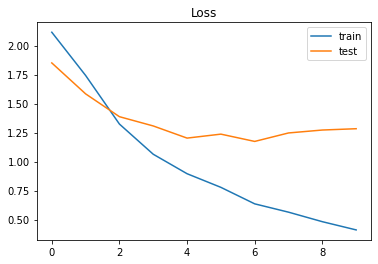

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

**Accuracy curve**

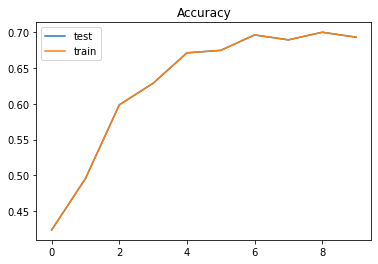

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['val_accuracy'], label='test')
plt.plot(history.history['val_accuracy'], label='train')
plt.legend()
plt.show();

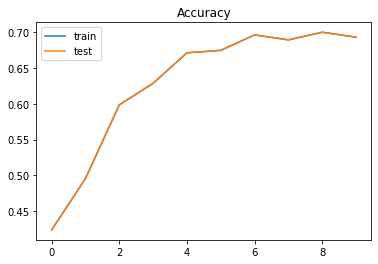

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['val_accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')

plt.legend()
plt.show();

**Save & Upload our model**

In [ ]:
from joblib import dump, load
dump(model, 'model_lstm1.joblib')

INFO:tensorflow:Assets written to: ram://6ccfa85b-bcac-4ead-8eda-48332ac69c8b/assets


INFO:tensorflow:Assets written to: ram://6ccfa85b-bcac-4ead-8eda-48332ac69c8b/assets


['model_lstm1.joblib']

In [ ]:
model_lstm = load('model_lstm1.joblib')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Test our model on new data**

In [ ]:
new_offer = ['nous voulons une personne qualifie en electronique et en connaissance des condensateurs']
seq = tokenizer.texts_to_sequences(new_offer)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'N', 'M']
print(pred, labels[np.argmax(pred)])

[[4.0679574e-03 1.2061710e-03 1.9801511e-04 6.6846330e-03 3.5098516e-03
  1.8564935e-03 9.8962290e-04 9.4776756e-01 3.2189570e-03 4.1067615e-04
  2.5446530e-02 1.0481569e-04 2.2060708e-03 2.3327777e-03]] H


In [ ]:
new_offer = ['nous voulons qui puisse afficher et nettoyer les sols']
seq = tokenizer.texts_to_sequences(new_offer)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'N', 'M']
print(pred, labels[np.argmax(pred)])

[[0.00484748 0.00445662 0.0107516  0.01828167 0.02981633 0.01693364
  0.02205349 0.08402391 0.0186921  0.0267739  0.5811797  0.0049663
  0.17237183 0.0048515 ]] K


In [ ]:
print(metrics.classification_report(y_test, y_prediction, target_names=list(df_train["categorie"].unique())))

# Pipeline for the LSTM Model

In [ ]:
!git lfs install
!git clone https://huggingface.co/JEFFREY-VERDIERE/model_lstm


Error: Failed to call git rev-parse --git-dir --show-toplevel: "fatal: not a git repository (or any of the parent directories): .git\n"
Git LFS initialized.
Cloning into 'model_lstm'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [ ]:
def preprocessing_LSTM(text):
    text = text.lower()
    text = text.replace('(', ' ').replace(')', ' ').replace('.', ' ').replace('  ', ' ')  #drop '(', ')', '.'
    text = nlp(text)
    #words = [token.text for token in sent for sent in doc.sents if not token.text in set(stopwords)]
    words = [token.lemma_ for sent in text.sents for token in sent if not token.text in set(stopwords)]
    string = ' '.join(words)
    return string

In [ ]:
def preprocessing_LSTM(texts_array):
    """preprocessing the strings through the array to predict using the predict_tfidf function
    return an array of string"""

    import numpy as np
    import nltk
    import spacy
    nltk.download('stopwords')

    stopwords = nltk.corpus.stopwords.words('french')
    nlp = spacy.load("fr_core_news_sm")

    init_shape  = texts_array.shape
    
    def preprocess(text):
      text = text.lower()
      text = text.replace('(', ' ').replace(')', ' ').replace('.', ' ').replace('  ', ' ')  #drop '(', ')', '.'
      text = nlp(text)
      words = [token.lemma_ for sent in text.sents for token in sent if not token.text in set(stopwords)]
      string = ' '.join(words)
      return string

    def tockenization_LSTM(new_offer):
      MAX_SEQUENCE_LENGTH=250
      seq = tokenizer.texts_to_sequences(preprocessing(new_offer))
      padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
      return(padded)

    preprocessed_text = np.array([tockenization_LSTM(preprocess(txt)) for txt in list(texts_array.flatten())])
    

    return preprocessed_text.reshape(init_shape)

In [ ]:
def predict_LSTM(texts_array):
  import pickle
  import numpy as np
  lstm_model = pickle.load(open("/content/model_lstm/model_lstm1.joblib", 'rb')) 
  predictions = np.array([lstm_model.predict(txt_prepro)  for txt_prepro in list(preprocessing_LSTM(texts_array.flatten()))])
  labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'N', 'M']
  predictions = labels[np.argmax(predictions)]
 
  
  return (predictions.reshape(texts_array.shape))

In [ ]:
def load_LSTM():
  import pickle
  import numpy as np
  global lstm_model = pickle.load(open("/content/model_lstm/model_lstm1.joblib", 'rb')) 

def get_LSTM():
  return lstm_model
